Natalia Arteaga May 2025. Welcome to my Diabetes Predictor Machine Learning Model! In this model, I go through real diabetes data to predict whether a patient will have diabetes.

In [1]:
#I will start by installing xgb boost
!pip install numpy pandas scikit-learn xgboost fastapi uvicorn joblib

In [9]:
#Next, I will import more tools 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

print("All libraries installed successfully!")

All libraries installed successfully!


In [10]:
import pandas as pd

# Load your dataset from the uploaded file
file_path = r"C:\Users\natal\Downloads\Portfolio\diabetes.csv"

diabetes = pd.read_csv(file_path)

# Show first few rows
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
#Finding unique values 
diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [13]:
#Identify nulls
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
#Now I'll do some feature engineering to replace zeros with NaN
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
diabetes[columns_to_replace] = diabetes[columns_to_replace].replace(0,np.nan)

In [16]:
#Add mising values using median
imputer = SimpleImputer(strategy='median')
diabetes[columns_to_replace] = imputer.fit_transform(diabetes[columns_to_replace])

In [17]:
#Separate features and target (outcome, 1 = has diabetes | 0 = does not have diabetes)
X = diabetes.drop('Outcome', axis=1) #features
y = diabetes['Outcome'] #target

In [20]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y, random_state=42)

In [21]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
#Train models. I will use logistic regression, random forest and XGBoost
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(
        scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
}

predictions = {}
probas = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)
    probas[name] = model.predict_proba(X_test)[:, 1]

C:\Users\natal\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:13:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [23]:
#Now I will evaluate and print the results
for name in models:
    print(f"\n{name}")
    print(classification_report(y_test, predictions[name], digits=4))
    print("ROC AUC:", round(roc_auc_score(y_test, probas[name]), 4))


Logistic Regression
              precision    recall  f1-score   support

           0     0.8322    0.7933    0.8123       150
           1     0.6477    0.7037    0.6746        81

    accuracy                         0.7619       231
   macro avg     0.7399    0.7485    0.7434       231
weighted avg     0.7675    0.7619    0.7640       231

ROC AUC: 0.8365

Random Forest
              precision    recall  f1-score   support

           0     0.7751    0.8733    0.8213       150
           1     0.6935    0.5309    0.6014        81

    accuracy                         0.7532       231
   macro avg     0.7343    0.7021    0.7114       231
weighted avg     0.7465    0.7532    0.7442       231

ROC AUC: 0.8344

XGBoost
              precision    recall  f1-score   support

           0     0.8026    0.8133    0.8079       150
           1     0.6456    0.6296    0.6375        81

    accuracy                         0.7489       231
   macro avg     0.7241    0.7215    0.7227       2

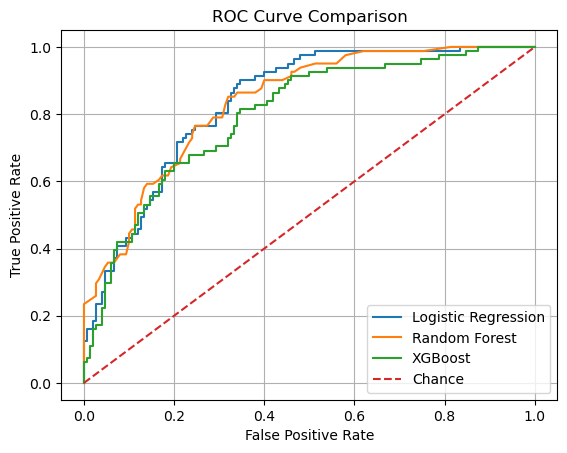

In [24]:
#Now I will plot the ROC curves 
plt.figure()
for name in models:
    fpr, tpr, _ = roc_curve(y_test, probas[name])
    plt.plot(fpr, tpr, label=name)
plt.plot([0, 1], [0, 1], linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

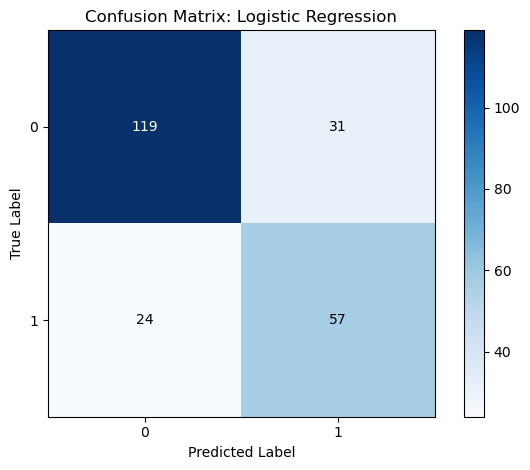

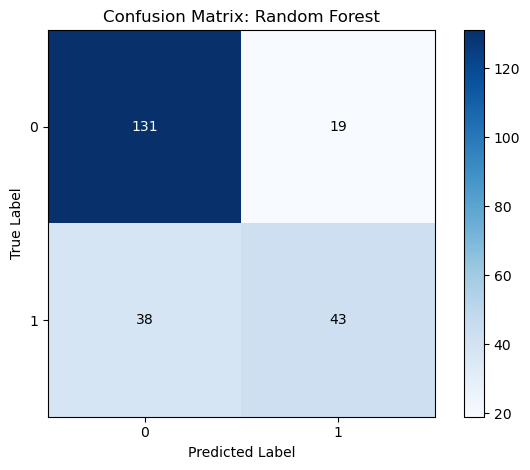

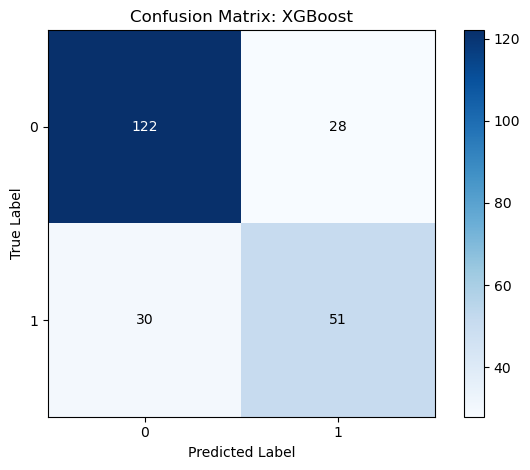

In [27]:
#Now I will plot the confusion matrices
    
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

for name in models:
    cm = confusion_matrix(y_test, predictions[name])
    plt.figure()
    plt.imshow(cm, cmap='Blues', interpolation='nearest')        
    plt.title(f'Confusion Matrix: {name}', color='black')       
    plt.xlabel('Predicted Label', color='black')
    plt.ylabel('True Label', color='black')
    cbar = plt.colorbar()
    cbar.ax.yaxis.set_tick_params(color='black')
    plt.xticks([0, 1], color='black')
    plt.yticks([0, 1], color='black')

    # annotate cells
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i,
                     format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.show()


Despite how simple logistic regression may seem, in this case it provides the best trade-off between sensitivity (the share of true diabetics) and specificity (the share of non-diabetics it correctly dismisses.) Mode complex model will require extra parameter tunning or more targeted feature engineering to beat this baseline.